In [1]:
class NeuralNetwork:
    
    def __init__(self,topology):
        self.sigmoid = (lambda x: 1/(1+np.e**(-x)), lambda x: x*(1-x))
            #Sigmoid function and its derivative
        self.act_function=self.sigmoid
            #Assigning sigmoid as activation function
        self.topology=topology
            #Storing the topology
        self.nn=[]
            #Where bias and weights values of each layer are going to be
        self.cost= (lambda Yp, Yr:np.mean((Yp-Yr)**2), lambda Yp,Yr: (Yp-Yr))
            #Cost function defined as mean square error and its derivative
        self.lr=0.05
            #Learning rate
        self.create()
            #Funciton that creates the network
      
    
    def neuralLayer(self,n_conexion,n_neuron):
        #Creating a layer
        
        self.bias = np.random.rand(1, n_neuron)*2-1
            #Random bias value for each neuron
        self.weight = np.random.rand(n_conexion, n_neuron)*2-1
            #Random weight value for each neuron with its conexions
        return [self.bias,self.weight]
            #Creating a matrix with the values
        
    
    def plotSigmoid(self):
        _x=np.linspace(-7,7,100)
        plt.plot(_x,self.sigmoid[0](_x))
        plt.show()
            #Plotting sigmoid function
        
        
    def create(self):
        #Method that build the network
        
        for l,layer in enumerate(self.topology[:-1]):
        
            self.nn.append(self.neuralLayer(self.topology[l],self.topology[l+1]))
                #The method that creates a single layer is called multiple times acordding to the topology input
    
    def training(self,X,Y,train):
        
        out=[(None,X)]
        
        for l,layer in enumerate(self.nn):
            z= out[-1][1] @ self.nn[l][1] + self.nn[l][0]
                #Calculate Weighted Average
            a=self.act_function[0](z)
                #Applying the activation function
            out.append((z,a))
    
        if train:
            #If train is True, Back propagation and gradient descent algorithm will be executed

            deltas = []
            for l in reversed(range(0,len(self.nn))):
                z=out[l+1][0]
                a=out[l+1][1]

                if l==len(self.nn) -1:
                    deltas.insert(0,self.cost[1](a,Y)*self.act_function[1](a))
                        #Calculating the last layer error
                else:
                    deltas.insert(0,deltas[0] @ _w.T *self.act_function[1](a))
                        #Retro propagating the error to the previus layer    

                _w=self.nn[l][1]

        #gradient descent

            #Using the deltas calculated before in back propagation to optimize newtork parameter
                self.nn[l][0] = self.nn[l][0] -np.mean(deltas[0], axis=0, keepdims=True)*self.lr
                    #Gradient descent for bias
                        
                self.nn[l][1] = self.nn[l][1] -out[l][1].T @ deltas[0]*self.lr
                    #Gradient descent for weights
            
        return out[-1][1]

In [2]:
def execute():
    classifier=NeuralNetwork([p,4,8,1])

    loss=[]

    for i in range(1000):
        
        #Entrenamos la red
        
        pY=classifier.training(X,Y,True)
        
        if i % 25 == 0:
            
            loss.append(classifier.cost[0](pY,Y))
            
            res = 50
            
            _x0 = np.linspace(-1.5,1.5,res)
            _x1 = np.linspace(-1.5,1.5,res)
            
            _Y=np.zeros((res,res))
            
            for i0,x0 in enumerate(_x0):
                for i1,x1 in enumerate(_x1):
                    _Y[i0,i1]=classifier.training(np.array([[x0,x1]]),Y,False)[0][0]
                    
            plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
            plt.axis("equal")
            
            plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c="skyblue")
            plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c="salmon")
            
            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss)),loss)
            plt.show()
            time.sleep(0.5)

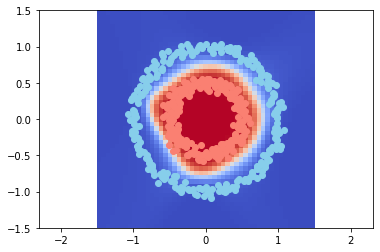

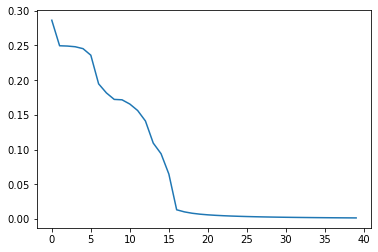

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from sklearn.datasets import make_circles

n=500 #Data
p=2 #Features

X,Y =make_circles(n_samples=n,factor=0.5,noise=0.05)
    #X as inputs and Y as outputs
Y=Y[:,np.newaxis]
    #Adding a new axis
execute()